# Training

# Data is reading from drive

In [1]:
#2023H1030076P_Lab_1

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"D:\DL lab\Labsheet_1\train.csv")
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [3]:
print(df)

      x          y
0    24  21.549452
1    50  47.464463
2    15  17.218656
3    38  36.586398
4    87  87.288984
..   ..        ...
694  58  58.595006
695  93  94.625094
696  82  88.603770
697  66  63.648685
698  97  94.975266

[699 rows x 2 columns]


In [4]:
df.columns

Index(['x', 'y'], dtype='object')

In [5]:
df.columns = [0,1]

In [6]:
# Finding number of zeroes in all columns
for column_name in df.columns:
    column = df[column_name]
    # counting zeros in column
    count = (column == 0).sum()
    print('Zeros in', column_name, 'is:', count)

Zeros in 0 is: 8
Zeros in 1 is: 0


In [7]:
# Count number of nan in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of nan in column
    count = sum(pd.isnull(column))
    print('Count of NaN in column ', column_name, ' is : ', count)

Count of NaN in column  0  is :  0
Count of NaN in column  1  is :  0


In [8]:
# replace 0 with nan
df[0] = df[0].replace(0, np.nan)
df[1] = df[1].replace(0, np.nan)

In [9]:
# Finding number of rows with missing values
df.isnull().any(axis=1).sum()

8

In [10]:
# drop row if missing value present in that row
df_dropped = df.dropna()
print(df_dropped.shape)

(691, 2)


In [11]:
# count number of rows
count_row = df_dropped.shape[0]
print(count_row)

691


In [12]:
# copy the data
df_min_max_scaled = df_dropped.copy()

# apply normalization techniques
for column in df_dropped.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# view normalized data
print(df_min_max_scaled)

            0         1
0    0.232323  0.225260
1    0.494949  0.455183
2    0.141414  0.186836
3    0.373737  0.358671
4    0.868687  0.808515
..        ...       ...
694  0.575758  0.553936
695  0.929293  0.873602
696  0.818182  0.820180
697  0.656566  0.598773
698  0.969697  0.876709

[691 rows x 2 columns]


In [13]:
theta = [0,0]

In [14]:
def hypothesis(theta, X):
    return theta[0] + theta[1]*X

In [15]:
m = len(df)     #Calculate the number of training data as the length of the DataFrame.
def cost_calc(theta, X, y):
    return (1/2*m) * np.sum((hypothesis(theta, X) - y)**2)

In [16]:
def gradient_descent(theta, X, y, epoch, alpha):
    cost = []
    i = 0
    while i < epoch:
        hx = hypothesis(theta, X)
        theta[0] -= alpha*(np.sum(hx-y)/m)
        theta[1] -= (alpha * np.sum((hx - y) * X))/m
        cost.append(cost_calc(theta, X, y))
        i += 1
    return theta, cost

In [17]:
def predict(theta, X, y, epoch, alpha):
    theta, cost = gradient_descent(theta, X, y, epoch, alpha)
    return hypothesis(theta, X), cost, theta

In [18]:
y_predict, cost, theta_f = predict(theta, df_min_max_scaled[0], df_min_max_scaled[1], 10000, 0.01)
print(theta_f)

[0.04251478192518813, 0.8779502565329209]


In [19]:
print(theta_f[0],theta_f[1])


0.04251478192518813 0.8779502565329209


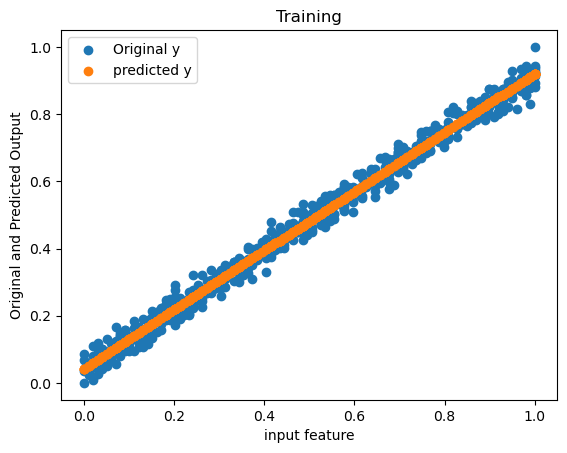

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df_min_max_scaled[0], df_min_max_scaled[1], label = 'Original y')
plt.scatter(df_min_max_scaled[0], y_predict, label = 'predicted y')
plt.legend(loc = "upper left")
plt.xlabel("input feature")
plt.ylabel("Original and Predicted Output")
plt.title("Training")
plt.show()

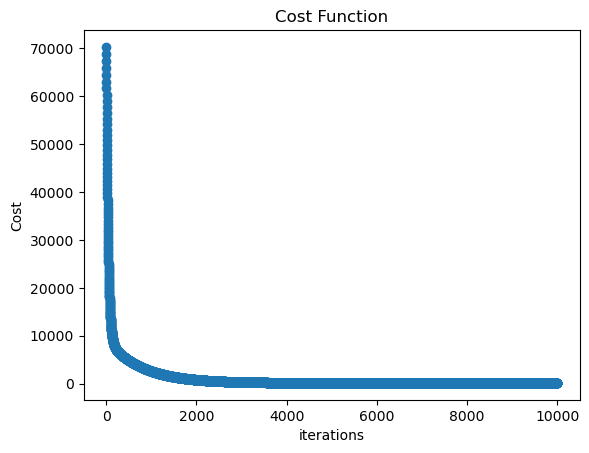

In [21]:
plt.figure()
plt.scatter(range(0, len(cost)), cost)
plt.title("Cost Function")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

In [22]:
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [23]:
r2_score = r_squared(df_min_max_scaled[1], y_predict)
print("R-squared:", r2_score)

R-squared: 0.9904138540462569


# Test  perform on the  parameter got from training  theta_0  and Theta_1


# Data is reading from drive

In [24]:
df_test = pd.read_csv(r"D:\DL lab\Labsheet_1\test.csv")

In [25]:
df_test
#print(df_test)
#df_test.head(300)  #it return data from index 0 to 299.

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [26]:
df_test.columns

Index(['x', 'y'], dtype='object')

In [27]:
# Finding number of zeroes in all columns
for column_name in df_test.columns:
    column = df_test[column_name]
    # counting zeros in column
    count = (column == 0).sum()
    print('Zeros in', column_name, 'is:', count)

Zeros in x is: 3
Zeros in y is: 0


In [28]:
# Count number of nan in all columns of Dataframe
for column_name in df_test.columns:
    column = df_test[column_name]
    # Get the count of nan in column
    count = sum(pd.isnull(column))
    print('Count of NaN in column ', column_name, ' is : ', count)

Count of NaN in column  x  is :  0
Count of NaN in column  y  is :  0


In [29]:
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [30]:
# Drop rows where either x or y column has a zero
# df_dropped = df_test[(df_test['x'] != 0) & (df_test['y'] != 0)]

# print(df_dropped)
# print(df_dropped.shape)

In [31]:
# drop row if missing value present in that row
df_dropped = df_test.dropna()
print(df_dropped.shape)

(300, 2)


In [32]:
print(df_dropped.iloc[:, 0])

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64


In [33]:
# copy the data
df_min_max_scaled_test = df_dropped.copy()

# apply normalization techniques
for column in df_dropped.columns:
    df_min_max_scaled_test[column] = (df_min_max_scaled_test[column] - df_min_max_scaled_test[column].min()) / (df_min_max_scaled_test[column].max() - df_min_max_scaled_test[column].min())

# view normalized data
print(df_min_max_scaled_test)

        x         y
0    0.77  0.763279
1    0.21  0.244317
2    0.22  0.266617
3    0.20  0.195538
4    0.36  0.415531
..    ...       ...
295  0.71  0.660315
296  0.46  0.465825
297  0.55  0.527771
298  0.62  0.612188
299  0.47  0.512814

[300 rows x 2 columns]


In [34]:
def hypothes(theta_f, x):
    return theta_f[0] + theta_f[1]*x

In [35]:
print(df_min_max_scaled_test.columns[0])

x


In [36]:
y_predict_test = hypothes(theta_f, df_min_max_scaled_test.iloc[:, 0])
print(y_predict_test)

0      0.718536
1      0.226884
2      0.235664
3      0.218105
4      0.358577
         ...   
295    0.665859
296    0.446372
297    0.525387
298    0.586844
299    0.455151
Name: x, Length: 300, dtype: float64


In [37]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.figure()
# plt.scatter(df_min_max_scaled_test.iloc[:, 0], df_min_max_scaled_test.iloc[:, 1], label = 'Original y')
# plt.scatter(df_min_max_scaled_test.iloc[:, 0], y_predict_test, label = 'predicted y')
# plt.legend(loc = "upper left")
# plt.xlabel("input feature")
# plt.ylabel("Original and Predicted Output")
# plt.title("Testing")
# plt.show()

In [38]:
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [39]:
r2_score = r_squared(df_min_max_scaled_test.iloc[:, 1], y_predict_test)
print("R-squared:", r2_score)

R-squared: 0.9841142967378815
